In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import os
os.chdir('/content/drive/MyDrive/Project/Cap1')

In [77]:
df =pd.read_csv('Telco-Customer-Churn.csv',index_col=0,header=0)

In [78]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [80]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn', ylabel='count'>

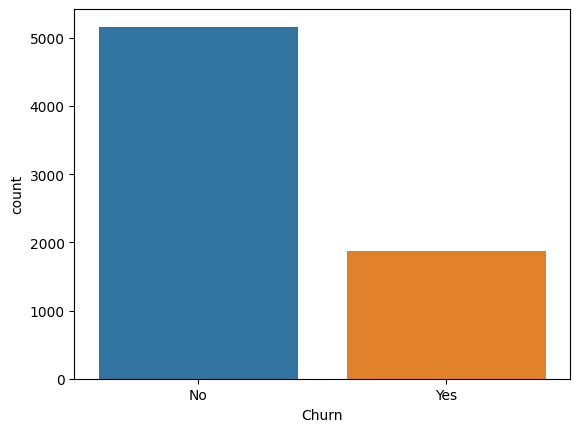

In [82]:
sns.countplot(data=df,x='Churn')

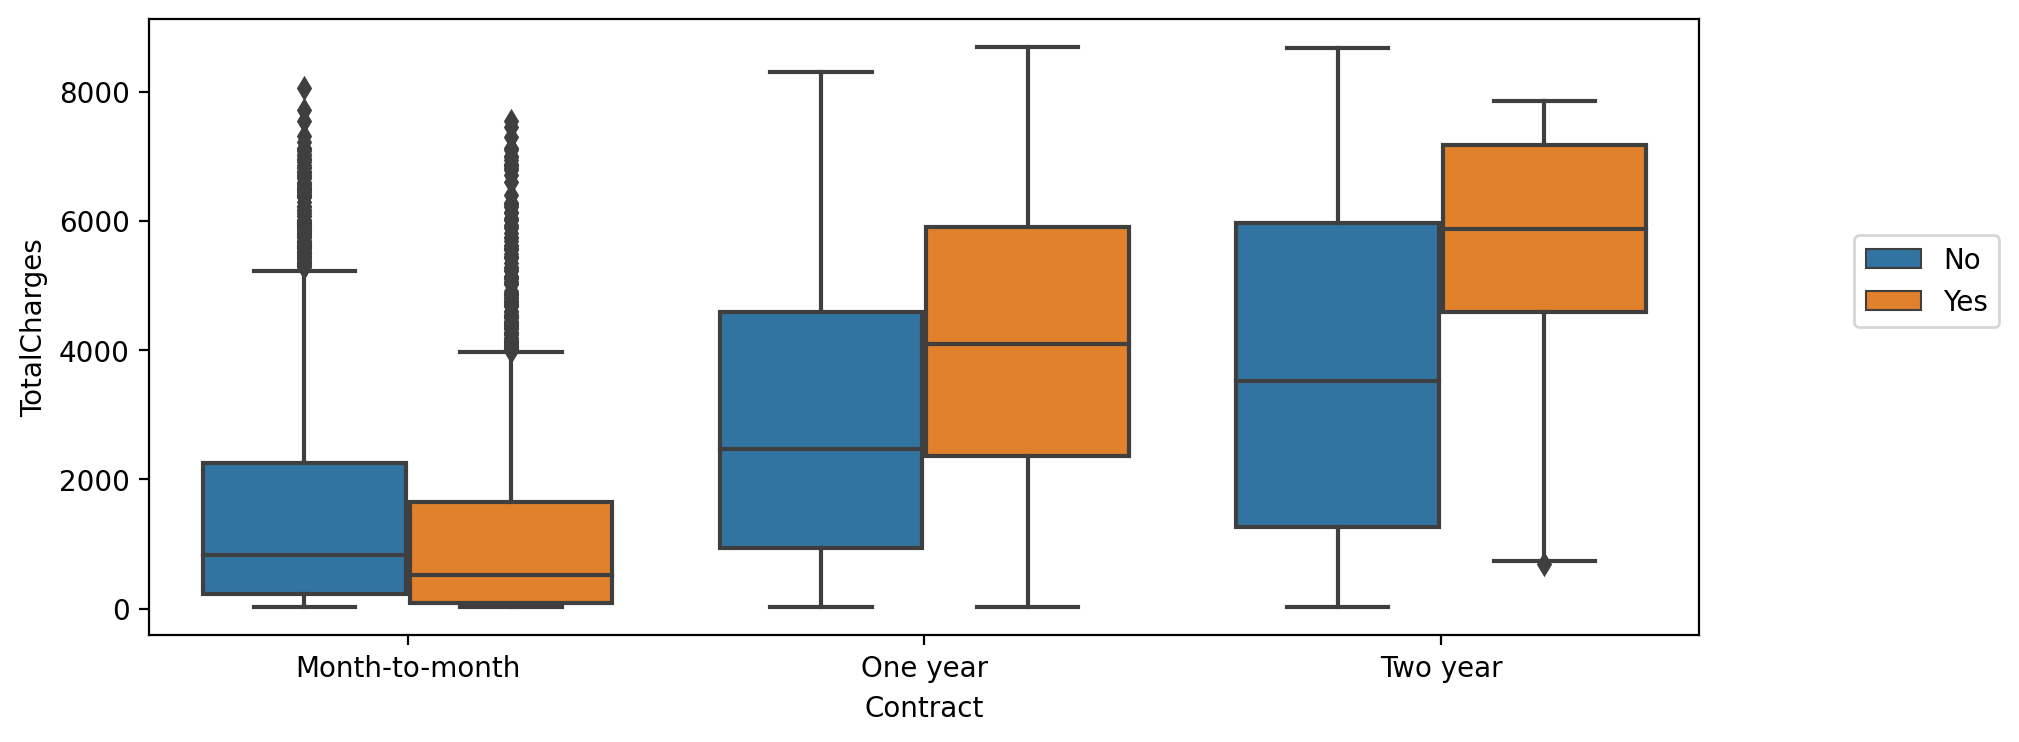

In [83]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [85]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [86]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', categorical_features)
print('Numerical Features :', numerical_features)

Categorical Features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features : ['tenure', 'MonthlyCharges', 'TotalCharges']


In [87]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


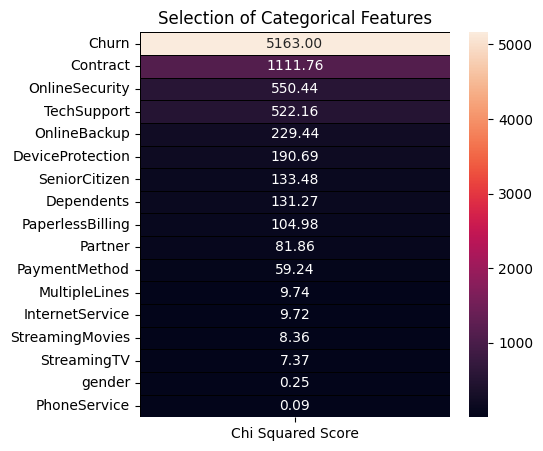

In [89]:
features = df.loc[:,categorical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

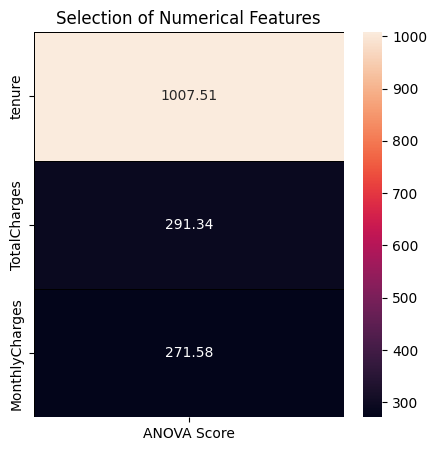

In [90]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');


In [91]:
X = df.drop(['Churn','PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],axis=1)

In [92]:
y = df['Churn']

In [93]:
# #CODE HERE
# from sklearn.preprocessing import LabelEncoder
# cat_cols = X.select_dtypes(include = 'object')
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# cols = cat_cols.columns
# for i in range(len(cols)):
#     X[cols[i]]=le.fit_transform(X[cols[i]])
#     print(i,' : ',X[i].unique(),' = ',le.inverse_transform(X[i].unique()))


In [94]:
X['SeniorCitizen'].unique()

array([0, 1])

In [95]:
#  y = le.fit_transform(y)
# y

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0 )

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [99]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc

{'sokalsneath', 'infinity', 'haversine', 'p', 'minkowski', 'wminkowski', 'nan_euclidean', 'seuclidean', 'yule', 'rogerstanimoto', 'pyfunc', 'euclidean', 'chebyshev', 'russellrao', 'braycurtis', 'correlation', 'jaccard', 'kulsinski', 'l2', 'sqeuclidean', 'cosine', 'precomputed', 'canberra', 'manhattan', 'mahalanobis', 'cityblock', 'sokalmichener', 'matching', 'hamming', 'l1', 'dice'} or

In [100]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=10,  weights='uniform', algorithm='brute', leaf_size=40, p=2, metric='l2', metric_params=None, n_jobs=-1)
KNNmodel.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1235  320]
 [ 210  345]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1555
           1       0.52      0.62      0.57       555

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.69      2110
weighted avg       0.77      0.75      0.76      2110



In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy', max_depth=780, max_features='auto',
                       min_samples_leaf=3, min_samples_split=16,
                       n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[1289  266]
 [ 191  364]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1555
           1       0.58      0.66      0.61       555

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.78      0.79      2110



In [69]:
y_test

customerID
5088-QZLRL     No
0787-LHDYT     No
8562-GHPPI     No
1334-FJSVR    Yes
3551-HUAZH    Yes
             ... 
2650-GYRYL     No
5213-TWWJU     No
1480-IVEVR     No
2560-QTSBS     No
0962-CQPWQ     No
Name: Churn, Length: 2110, dtype: object

In [103]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [104]:

XGBmodel = XGBClassifier(max_depth=200, subsample = 0.1,
                      n_estimators=10000,learning_rate=0.0001,min_child_weight=1,random_state=10)
XGBmodel.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1246  309]
 [ 158  397]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1555
           1       0.56      0.72      0.63       555

    accuracy                           0.78      2110
   macro avg       0.72      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110



In [ ]:
import joblib

In [ ]:
# joblib.dump(scaler,'svm_scaler.pkl')

['svm_scaler.pkl']

In [ ]:
# joblib.dump(XGBmodel,'XGBmodel.pkl')

['XGBmodel.pkl']

In [ ]:
import pickle

In [ ]:
# pkl_filename = "XGBmodel.pkl"
# with open(pkl_filename, 'wb') as file1:
#     pickle.dump(XGBmodel, file1)

In [105]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1165  390]
 [ 134  421]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1555
           1       0.52      0.76      0.62       555

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [106]:
# def model(classifier,x_train,y_train,x_test,y_test):

#     classifier.fit(x_train,y_train)
#     prediction = classifier.predict(x_test)
#     cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
#     print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
#     print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
#     roc_curve(x_test,y_test)
#     plt.title('ROC_AUC_Plot')
#     plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1555
           1       0.56      0.72      0.63       555

    accuracy                           0.78      2110
   macro avg       0.72      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110



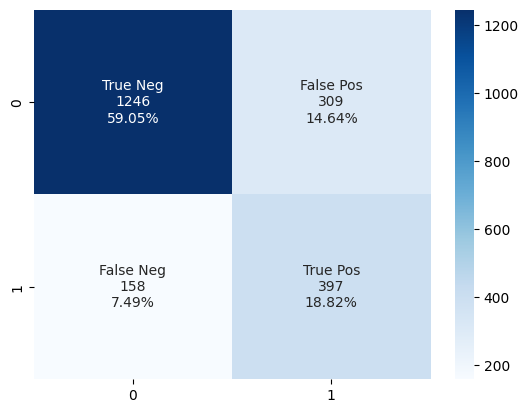

In [110]:
model_evaluation(XGBmodel,X_test, y_test)

In [ ]:
# gender  :  [0 1]  =  ['Female' 'Male']
# Partner  :  [1 0]  =  ['Yes' 'No']
# Dependents  :  [0 1]  =  ['No' 'Yes']
# PhoneService  :  [0 1]  =  ['No' 'Yes']
# MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
# InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
# OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
# DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
# Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
# PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
# PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
#  'Credit card (automatic)']
# Churn  :  [0 1]  =  ['No' 'Yes']